# Import packages

In [0]:
import tensorflow.python.keras 
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
from tensorflow.python.keras.utils import np_utils 
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import sklearn.metrics as metrics
from tensorflow.python.keras import backend as K

# Visualizing MNIST dataset

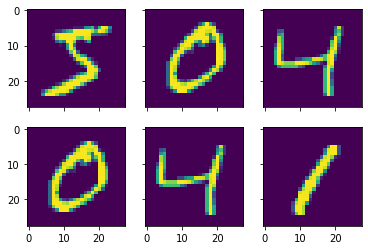

In [328]:
nrows = 2
ncols = 3
fig, ax = plt.subplots(nrows,ncols,sharex=True,sharey=True)
for row in range(nrows):
    for col in range(ncols):
        ax[row,col].imshow((x_train[row+col]*255).reshape((28,28)))  

# Multilayer Perceptron

## Load dataset

In [329]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test /= 255
# x_train=x_train[:500,:]
# x_test=x_test[:100,:]
# y_train=y_train[:500]
# y_test=y_test[:100]

print( 'train samples:',x_train.shape[0])
print('test samples: ',x_test.shape[0])

train samples: 60000
test samples:  10000


## Convert lables to categorical 

In [0]:
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Add layers to MLP

In [331]:
model = Sequential()
model.add(Dense(196, activation='relu', input_shape=(784,)))
model.add(Dense(196, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_103"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_274 (Dense)            (None, 196)               153860    
_________________________________________________________________
dense_275 (Dense)            (None, 196)               38612     
_________________________________________________________________
dense_276 (Dense)            (None, 10)                1970      
Total params: 194,442
Trainable params: 194,442
Non-trainable params: 0
_________________________________________________________________


## Fit train data and predict on test data

In [332]:
model.fit(x_train, y_train,batch_size=64, epochs=10,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

938/938 [==============================] - 4s 4ms/step - loss: 0.2379 - accuracy: 0.9301 - val_loss: 0.1231 - val_accuracy: 0.9609
Test loss: 0.12345636636018753
Test accuracy: 0.9609000086784363


## Experiment for different hidden layers

### 1 hidden layer

In [333]:
model = Sequential()
model.add(Dense(196, activation='relu', input_shape=(784,)))
# model.add(Dense(196, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,batch_size=64, epochs=1,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

938/938 [==============================] - 3s 3ms/step - loss: 0.2704 - accuracy: 0.9218 - val_loss: 0.1435 - val_accuracy: 0.9564
Test loss: 0.1438460499048233
Test accuracy: 0.9563999772071838


### 3 hidden layers

In [334]:
model = Sequential()
model.add(Dense(196, activation='relu', input_shape=(784,)))
model.add(Dense(196, activation='relu'))
model.add(Dense(196, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,batch_size=64, epochs=1,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
    


938/938 [==============================] - 5s 5ms/step - loss: 0.2344 - accuracy: 0.9316 - val_loss: 0.1042 - val_accuracy: 0.9664
Test loss: 0.1045110672712326
Test accuracy: 0.9664000272750854


## Experiment for different activation functions

### Sigmoid activation

In [335]:
model = Sequential()
model.add(Dense(196, activation='sigmoid', input_shape=(784,)))
model.add(Dense(196, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,batch_size=64, epochs=1,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

938/938 [==============================] - 4s 4ms/step - loss: 0.4628 - accuracy: 0.8739 - val_loss: 0.2274 - val_accuracy: 0.9324
Test loss: 0.22773189842700958
Test accuracy: 0.9323999881744385


### tanh activation

In [336]:
model = Sequential()
model.add(Dense(196, activation='tanh', input_shape=(784,)))
model.add(Dense(196, activation='tanh'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train,batch_size=64, epochs=1,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

938/938 [==============================] - 4s 4ms/step - loss: 0.2709 - accuracy: 0.9190 - val_loss: 0.1486 - val_accuracy: 0.9568
Test loss: 0.14902523159980774
Test accuracy: 0.9567999839782715


# CNN

## Load dataset

In [337]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# x_train=x_train[:500,:]
# x_test=x_test[:100,:]
# y_train=y_train[:500]
# y_test=y_test[:100]
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_train = x_train.astype('float32')
x_train /= 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
x_test = x_test.astype('float32')
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


## Adding layers to cnn

In [338]:
def model1():
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3,3), activation='relu',input_shape=(28, 28, 1)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    return model

model=model1()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,epochs=1,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1875/1875 [==============================] - 160s 85ms/step - loss: 0.1823 - accuracy: 0.9452 - val_loss: 0.0507 - val_accuracy: 0.9827
Test loss: 0.05065259709954262
Test accuracy: 0.982699990272522


## Experimentation for different layers

### 4 convoluton layers

In [339]:
def model2():
    model = Sequential()
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                    activation ='relu', input_shape = (28,28,1)))
    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                    activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                    activation ='relu'))
    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                    activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    return model
model=model2()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,epochs=1,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1875/1875 [==============================] - 418s 223ms/step - loss: 0.1641 - accuracy: 0.9490 - val_loss: 0.0385 - val_accuracy: 0.9871
Test loss: 0.03852987661957741
Test accuracy: 0.9871000051498413


### 2 convolution layers

In [340]:
def model2():
    model = Sequential()

    model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                    activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                    activation ='relu'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(256, activation = "relu"))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation = "softmax"))
    return model
model=model2()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train,epochs=1,verbose=1,validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

1875/1875 [==============================] - 93s 50ms/step - loss: 0.1946 - accuracy: 0.9392 - val_loss: 0.0398 - val_accuracy: 0.9877
Test loss: 0.039761245250701904
Test accuracy: 0.9876999855041504


# SVM

## Load dataset

In [345]:

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
# x_train=x_train[:500,:]
# x_test=x_test[:100,:]
# y_train=y_train[:500]
# y_test=y_test[:100]
print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')



(60000, 784) train samples
(10000, 784) test samples


### Scikit svm classifier

In [0]:
import sklearn
clf = sklearn.svm.SVC()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)

### Accuracy

In [1]:
print(sklearn.metrics.accuracy_score(y_pred,y_test))

0.9792
